In [44]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import copy
import tqdm
import pickle
# import files from above directory
plt.style.use('dark_background')
import os
import sys
import importlib  

from typing import Union,List, Dict

parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    # make sure it is added on top to load first in 
    # case there is name conflict with the py files
    sys.path.insert(0,parent_dir)
try:
    importlib.reload(models)
    importlib.reload(bt2)
except NameError:
    import models
    import bt2

In [45]:
# generate data
n=2000
x=np.random.normal(0,0.01,n)
a=0
b=0.1
y=a+b*x+np.random.normal(0,0.01,n)
dates=pd.date_range('2000-01-01',periods=n,freq='B')
data=pd.DataFrame(np.hstack((y[:,None],x[:,None])),columns=['y1','x1'],index=dates)
print(data)

                  y1        x1
2000-01-03  0.007969  0.002045
2000-01-04  0.000542 -0.011220
2000-01-05  0.002941 -0.016153
2000-01-06  0.002537  0.008435
2000-01-07  0.004581 -0.005045
...              ...       ...
2007-08-27 -0.007329 -0.007736
2007-08-28  0.016002  0.015613
2007-08-29 -0.005064  0.000132
2007-08-30 -0.013906 -0.014356
2007-08-31  0.006126  0.019320

[2000 rows x 2 columns]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 16.85it/s]


-> ACCEPT STRATEGY

** Performance summary **

Return:  0.0005364294378618335
Standard deviation:  0.00503788404770093
Sharpe:  0.10647911559350724

Return fee=0:  0.0005364294378618335
Standard deviation fee=0:  0.00503788404770093
Sharpe fee=0:  0.10647911559350724

**


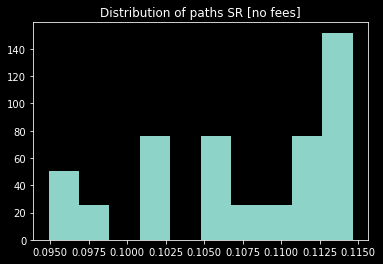

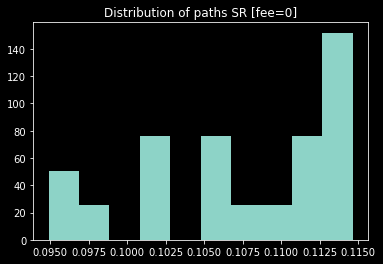

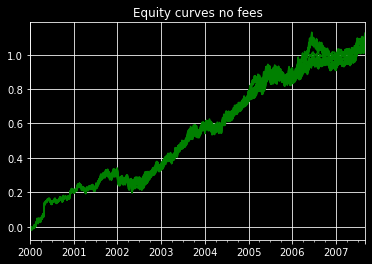

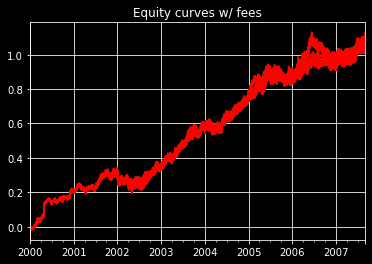

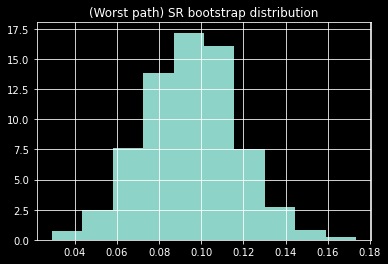

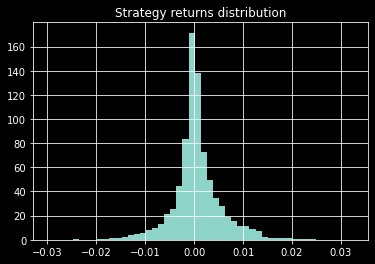

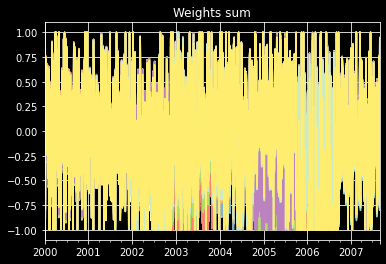

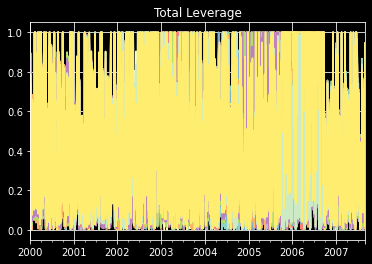

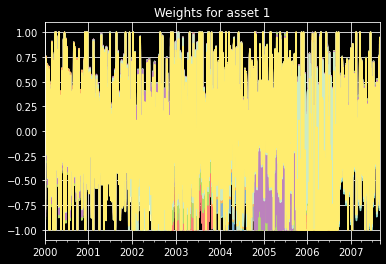

In [46]:

# convert data to Datum object
datum=bt2.Datum(data)
# build train test sets from Datum
train_test_datum_lst=datum.build_train_test(k_folds=8,seq_path=False,start_fold=0)

#print(sdfsdf)

model=models.ConditionalGaussian(n_gibbs=None)
out=bt2.cvbt(train_test_datum_lst,model)
out.post_process()